In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
img = cv2.imread('../../images_dataset/maria_sharapova/184-1847379_download-maria-sharapova-wallpaper-2013-wallpaper-hd-full.jpg')
img.shape

(739, 962, 3)

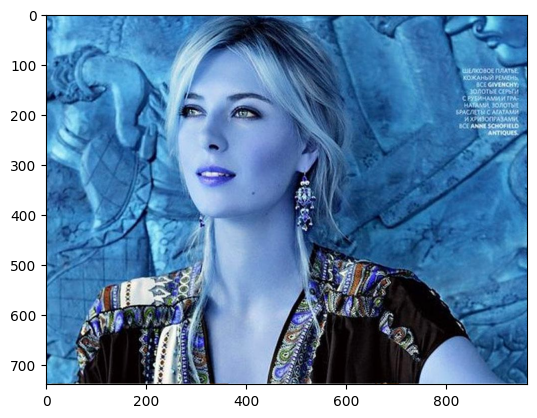

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(739, 962)

In [5]:
gray

array([[144, 145, 146, ..., 119, 117, 123],
       [139, 141, 143, ..., 125, 123, 128],
       [130, 133, 137, ..., 129, 126, 132],
       ...,
       [168, 157, 158, ..., 117,  92,  84],
       [171, 154, 151, ..., 113,  95,  88],
       [133, 116, 121, ..., 194, 184, 178]], dtype=uint8)

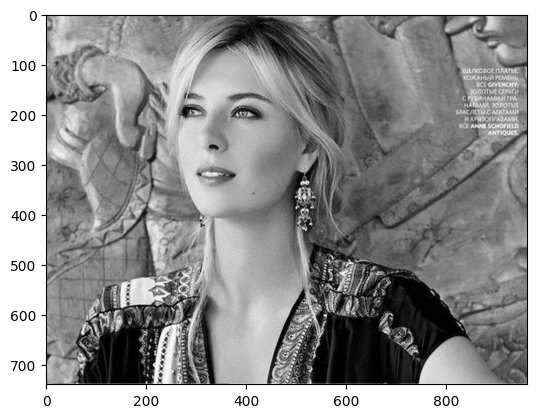

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv-data/haarcascade_frontalface_default.xml')
eye_cacade = cv2.CascadeClassifier('./opencv-data/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
# eyes = eye_cacade.detectMultiScale(gray,1.3,5)
# eyes
faces

array([[182,  69, 331, 331]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(182, 69, 331, 331)

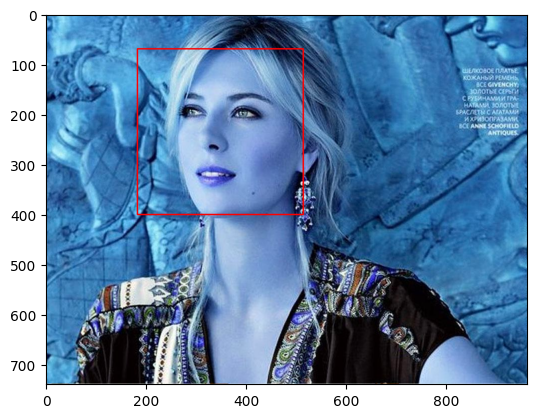

In [9]:
face_img = cv2.rectangle(img, (x,y), (x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

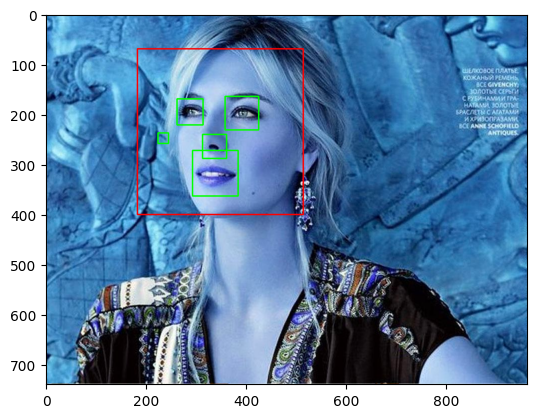

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cacade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey), (ex+ew,ey+eh),(0,255,0),2)
    
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

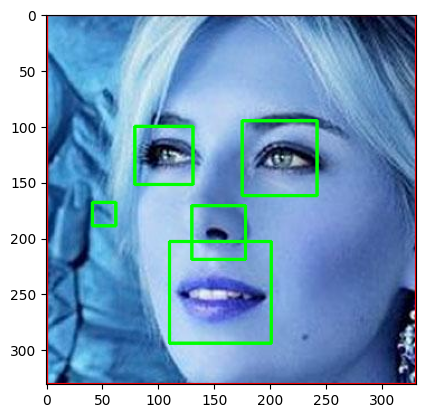

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        if len(eyes) >=2:
            return roi_color

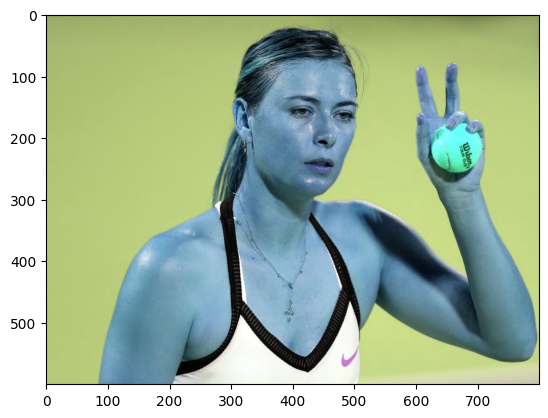

In [13]:
img_path = '../../images_dataset/maria_sharapova/sharapova-84bc97653a7b49b73fcb4919fec16a31aff3b806-s800-c85.jpg'
original_image = cv2.imread(img_path)
plt.imshow(original_image)

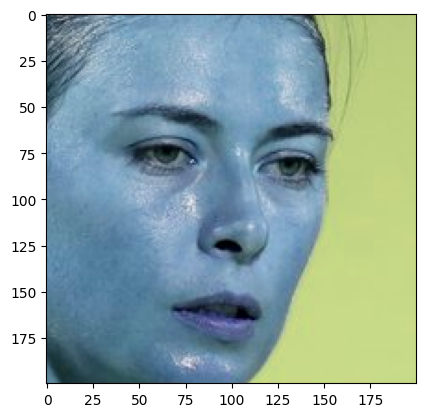

In [14]:
cropped_image = get_cropped_image_if_2_eyes(img_path)
plt.imshow(cropped_image)

In [15]:
path_to_data = '../../images_dataset/'
path_to_cr_data = '../../images_dataset/cropped_image/'

In [66]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)


In [67]:
img_dirs

['../../images_dataset/lionel_messi',
 '../../images_dataset/maria_sharapova',
 '../../images_dataset/roger_federer',
 '../../images_dataset/serena_williams',
 '../../images_dataset/virat_kohli']

In [64]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [69]:
print(path_to_cr_data)

../../images_dataset/cropped_image/


In [70]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/"+cropped_file_name

            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1


lionel_messi
Generating cropped images in folder:  ../../images_dataset/cropped_image/lionel_messi
maria_sharapova
Generating cropped images in folder:  ../../images_dataset/cropped_image/maria_sharapova
roger_federer
Generating cropped images in folder:  ../../images_dataset/cropped_image/roger_federer
serena_williams
Generating cropped images in folder:  ../../images_dataset/cropped_image/serena_williams
virat_kohli
Generating cropped images in folder:  ../../images_dataset/cropped_image/virat_kohli


In [71]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray =img
    imAray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imAray)
    imAray=imAray/255
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    coeffs_H = list(coeffs)
    coeffs_H[0] *=0

    imArray_H =pywt.waverec2(coeffs_H,mode)
    imArray_H *=255
    imArray_H = np.uint8(imArray_H)

    return imArray_H


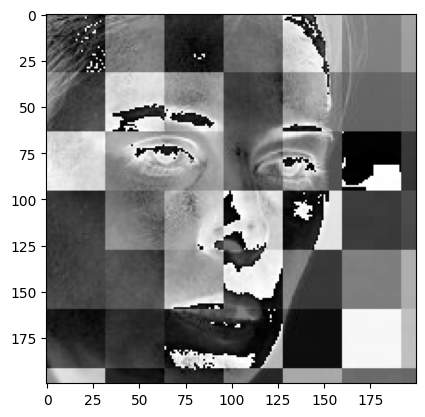

In [72]:
im_har =    w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')


In [73]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count = count+1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [74]:
X =[]
y=[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [75]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(210, 4096)

****Data Cleaning process is DONE. Nw we are ready to train our model****

In [76]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel='rbf',C=10))])

pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8490566037735849

In [78]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11
           3       0.83      0.56      0.67         9
           4       0.86      1.00      0.92        12

    accuracy                           0.85        53
   macro avg       0.85      0.83      0.83        53
weighted avg       0.85      0.85      0.84        53



**Let us use GridSearch to try out dfferent models with different parameters.Goal is to come up with best modle with best fine tune parameters**

In [79]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [80]:
model_params = {
    'svm':{
        'model':svm.SVC(gamma='auto',probability=True),
        'params': {
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forecast':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]

        }
    },
    'logistic_regression':
    {
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [81]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.847177,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forecast,0.700403,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.834879,{'logisticregression__C': 1}


In [82]:
best_estimators['svm'].score(X_test,y_test)

0.8490566037735849

In [83]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8679245283018868

In [87]:
best_clf = best_estimators['svm']

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(X_test))
cm
cm2=confusion_matrix(y_test,best_estimators['logistic_regression'].predict(X_test))
                      

In [92]:
cm2

array([[11,  1,  0,  0,  0],
       [ 0,  8,  0,  1,  0],
       [ 0,  2,  9,  0,  0],
       [ 0,  1,  1,  7,  0],
       [ 1,  0,  0,  0, 11]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

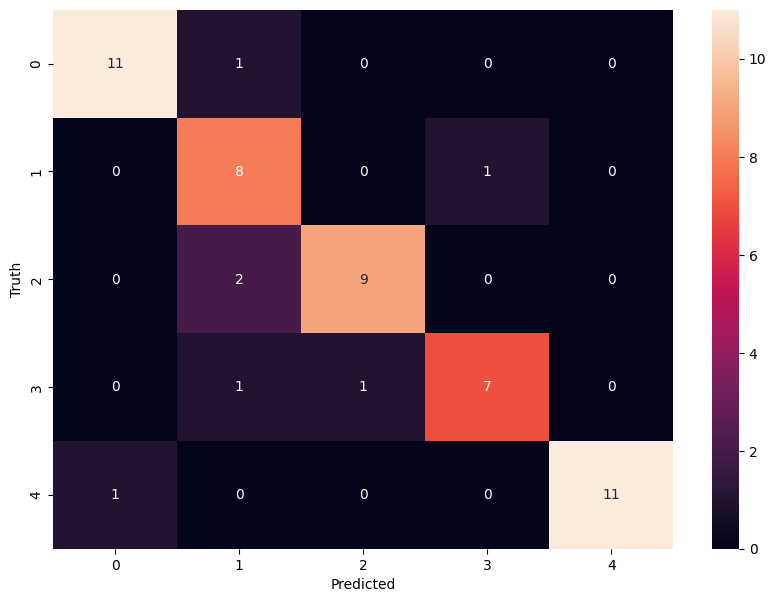

In [93]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [90]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [1]:
%pip install joblib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


: 

**Save the trained model**

In [95]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

**Save class Dictionary**

In [96]:
import json
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))